# Foundations of Data Science (FDS) CourseWork 1 - Semester 1, October 2020. 


#### Authors: Kobi Gal and David Sterratt

## Data Wrangling and visualization 
Released: Monday 19 October 2020 <br>
Deadline for submission: **Friday 30 Oct 4pm** on Learn

As per the Informatics [Late Coursework & Extensions](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) policy, late coursework without an authorised extension will be recorded as late and the following penalties will apply:<br>

- 5 percentage points will be deducted for every calendar day or part thereof it is late, up to a maximum of 7 calendar days. 

- If you have not submitted coursework within these 7 days, a mark of zero will be recorded. 
<br>

**It is very important that you read and follow the instructions below to the letter: you will be deducted marks for not adhering to the advice below.**

### Good Scholarly Practice 

Please remember the University requirement as regards all assessed work for credit.  Details about this can be found at: [http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct)
<br>
Specifically, this coursework **must be your own work**. We want you to be able to discuss the class material with each other, but the coursework you submit must be your own work. You are free to form study groups and discuss the concepts related to, and the high-level approach to the coursework. **You may never share code or share write-ups**. It is also not permitted to discuss this coursework on Piazza. The only exception is that if you believe there is an error in the coursework, you may ask a private question to the instructors, and if we feel that the issue is justified, we will send out an announcement.

### General Instructions 

- This assignment accounts for 20% of the mark for this course and is graded based on a Jupyter notebook, which you are to submit via Learn (see below). The actual assignment is marked out of 100 and the number of marks is indicated by each question below. 

- The criteria on which you will be judged include the functional code, and the quality of the textual answers and plots asked for. 

- Read the instructions carefully, answering what is required and only that. Keep your answers brief and concise. 

- For answers involving figures, make sure to clearly label your plots and provide legends where necessary. You will gain marks for clear visualizations. 

- For answers involving numerical values, use correct units where appropriate and format floating point values to a reasonable number of decimal places. 

### Submission 

Your submission should be in the form of a Jupyter notebook including your code, the visualizations you created for each question, and your analysis. The notebook will read the given data and generate the requested visualizations - it is not necessary to show the exploration of the data.  Please submit the notebook in three formats: ipynb, html, and pdf.  

### Coursework questions 

In this coursework, we will ask you to analyse and visualize two datasets. The coursework includes data from Japanese restaurants that was collected from multiple review sites.
<br>
The Japanese Restaurant Review Dataset includes reviews from the following websites:  
- [Hot Pepper Gourmet](https://www.hotpepper-gourmet.com/en) (hpg): similar to [Yelp](https://www.yelp.com/search?find_desc=Restaurants&find_loc=japan), here users can search restaurants and also make a reservation online.

- [AirREGI](https://airregi.jp) / Restaurant Board (air): similar to [Square](https://squareup.com/us/en), a reservation control and cash register system. 

The data includes the ID of the restaurant, the date and time of visits and reservation-making, restaurant location in Japan, and restaurant type. You will find explanations about the files and variables in them in the “Information_On_Files.txt” file in the files you download in step 1 below. 
<br>
In this assignment you will need to obtain datasets from different sources, preprocess the data, and generate visualizations that show interesting patterns. 

#### IMPORTS

Execute the cell below to import all packages you will be using for this assignment.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)
%matplotlib inline

print("All packages imported!")

All packages imported!


### Question 1: Download the datasets

Download the data sets from  
[https://github.com/Inf2-FDS/fds-coursework1](https://github.com/Inf2-FDS/fds-coursework1)
<br>
If you are using Noteable, you can clone this repository into Noteable as you have done with the Lab exercises. If you are not using Noteable, please do not fork the repository, leave the forked repository public, and thereby allow others to see your solutions. 

### Question 2: Same restaurants different datasets [20 marks]

The following question relates to customer visits in 2016 to those restaurants that appear in both **hpg** and **air** datasets (see store_id_relation.csv file). Which dataset generated more visits to these restaurants in 2016? Please visualize your answer. To determine whether a reservation was made for 2016 use the "visit_datetime" field in the respective reservation file hpg_reserve and air_reserve.

<BarContainer object of 2 artists>

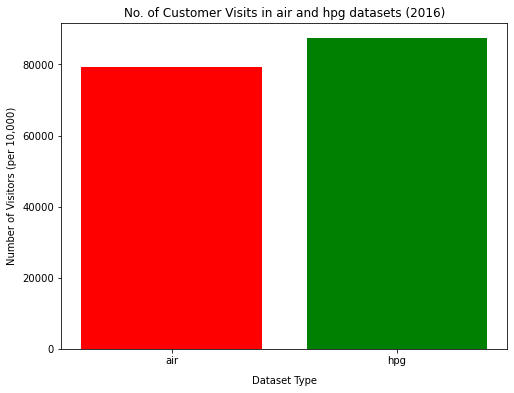

In [89]:
hpg_dataset = pd.read_csv("hpg_reserve.csv.gz") 
air_dataset = pd.read_csv("air_reserve.csv") 
store_relation = pd.read_csv("store_id_relation.csv")

air_dataFrame = pd.DataFrame(air_dataset)
air_dataFrame['visit_datetime'] = pd.to_datetime(air_dataFrame['visit_datetime'])

air_dataFrame = air_dataFrame[air_dataFrame['visit_datetime'].dt.strftime("%Y") == "2016"]
air_dataFrame = air_dataFrame[air_dataFrame['air_store_id'].isin(store_relation['air_store_id'])]

no_of_visitors_air = 0
for visitors in air_dataFrame['reserve_visitors']:
    no_of_visitors_air += visitors

hpg_dataFrame = pd.DataFrame(hpg_dataset)
hpg_dataFrame['visit_datetime'] = pd.to_datetime(hpg_dataFrame['visit_datetime'])

hpg_dataFrame = hpg_dataFrame[hpg_dataFrame['visit_datetime'].dt.strftime("%Y") == "2016"]
hpg_dataFrame = hpg_dataFrame[hpg_dataFrame['hpg_store_id'].isin(store_relation['hpg_store_id'])]

no_of_visitors_hpg = 0
for visitors in hpg_dataFrame['reserve_visitors']:
    no_of_visitors_hpg += visitors

    
no_of_visitors = [no_of_visitors_air, no_of_visitors_hpg]
dataset = ['air', 'hpg']
ypos = np.arange(len(dataset))
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(ypos, dataset)
plt.xlabel("Dataset Type", labelpad=10)
plt.ylabel("Number of Visitors (per 10,000)", labelpad=5)
plt.title("No. of Customer Visits in air and hpg datasets (2016)")
plt.bar(ypos, no_of_visitors, color = ['r', 'g'])

### Question 3: Restaurant genre and location [25 marks]

The following question relates to restaurants in the **air** dataset. Use a scatterplot to visualize restaurants by location and type of restaurant (you might want to add a small random noise to the restaurant location to reduce overlap in the plot). You can choose how to represent the restaurant location (e.g., longitude/latitude, distance from city centre, or other). Note there are many restaurant categories. You should collapse the different categories to 4 or 5 categories based on your best judgement (e.g., Asian, International, Bar and party, Cafe and sweets). What can you infer from the plot you created about the relationship of the restaurant categories and their location?

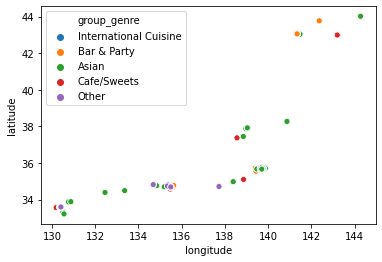

In [18]:
air_store_dataset = pd.read_csv('air_store_info.csv')
air_store_dataFrame = pd.DataFrame(air_store_dataset)

group_genre = []
for row in air_store_dataFrame['air_genre_name']:
    if row == 'Italian/French' or row == 'Western food' or row == 'International cuisine':
        group_genre.append('International Cuisine')
    elif row == 'Dining bar' or row == 'Bar/Cocktail' or row == 'Karaoke/Party':
        group_genre.append('Bar & Party')
    elif row == 'Yakiniku/Korean food' or row == 'Izakaya' or row == 'Okonomiyaki/Monja/Teppanyaki' or row == 'Japanese food' or row == 'Asian':
        group_genre.append('Asian')
    elif row == 'Cafe/Sweets':
        group_genre.append('Cafe/Sweets')
    else: group_genre.append('Other')
        
air_store_dataFrame['group_genre'] = group_genre
air_store_dataFrame_modified = air_store_dataFrame.drop(['air_store_id', 'air_genre_name', 'air_area_name'], axis=1)

sns.scatterplot(data=air_store_dataFrame_modified, x="longitude", y="latitude", hue="group_genre")


Majority of the restaurant categories are located within a short longitude/latitude span which may suggest that these categories that are found within a central city area. Also, as most categories are close to each other based on longitude/latitude values it suggests that that an area offers many places to eat with most of these places having different food genres.

### Question 4: Mean number of visitors [15 marks]
The following question relates to the **air** data set. Plot the trend of the mean number of visitors to restaurants vs. a time unit of your choice (e.g, daily, weekly, etc…). What is the trend that you see?  

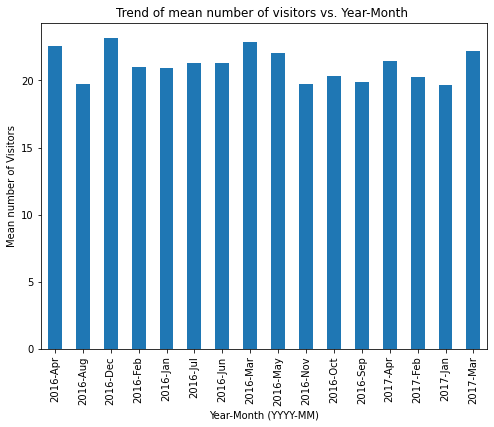

In [50]:
air_visit_dataset = pd.read_csv('air_visit_data.csv')
air_visit_dataframe = pd.DataFrame(air_visit_dataset)
air_visit_dataframe['visit_date'] = pd.to_datetime(air_visit_dataframe['visit_date'])

air_visit_dataframe['month_year_visit'] = air_visit_dataframe['visit_date'].map(lambda x: x.strftime('%Y-%b'))

air_visit_dataframe_modified = air_visit_dataframe.drop(['air_store_id', 'visit_date'], axis=1)
air_visit_dataframe_modified = air_visit_dataframe_modified.groupby('month_year_visit')['visitors'].mean()

air_visit_dataframe_modified.plot(kind='bar', figsize=(8,6), title = "Trend of mean number of visitors vs. Year-Month ", xlabel = "Year-Month (YYYY-MM)", ylabel = "Mean number of Visitors")

On average as most customers are visiting in the months of December and March which suggests that there may be holidays/festivites that occur in these months.

### Question 5: Histogram [15 marks]
The following question relates to the **hpg** data set. Create a histogram of the number of visitors per day of the week (Sunday, Monday, …, Saturday). What can you infer from this graph? 

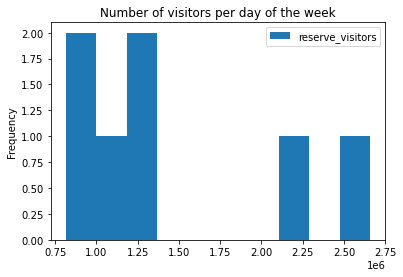

In [21]:
hpg_reserve_dataset = pd.read_csv("hpg_reserve.csv.gz")
hpg_reserve_dataframe = pd.DataFrame(hpg_reserve_dataset)
hpg_reserve_dataframe['visit_datetime'] = pd.to_datetime(hpg_reserve_dataframe['visit_datetime'])
hpg_reserve_dataframe['Day'] = hpg_reserve_dataframe['visit_datetime'].map(lambda x: x.strftime('%A'))

hpg_reserve_dataframe_modified = hpg_reserve_dataframe.groupby('Day')['reserve_visitors'].sum()
hpg_reserve_dataframe_modified.plot(kind='hist', title = 'Number of visitors per day of the week', legend='reserve_visitors')


The number of visitors is highest on Friday and Saturday, this could be as the weekend starts on Friday. The number of visitors starts to taper down from Sunday.  

### Question 6: Food passion [25 marks]

The following question relates to the **air** data set. We wish to determine which restaurant genre Japanese people are most passionate about. To this end we will analyse how much time people plan ahead before visiting a restaurant.  

- Compute the time difference between reservation time and visit time. 

- Compare the time differences among restaurant genres using a visualization of your choice. Tip: In order to avoid outliers, it might be best to choose an upper threshold for values of preparation time. You may want to use the genre categories used in question 3 to reduce clutter. 

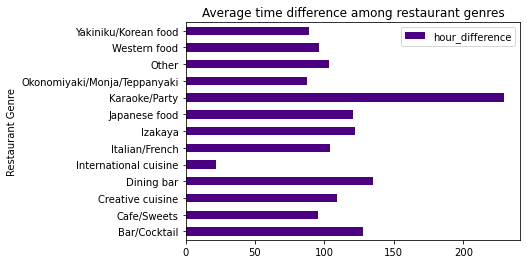

In [68]:
air_reserve_dataset = pd.read_csv('air_reserve.csv')
air_reserve_dataFrame = pd.DataFrame(air_reserve_dataset)
air_store_info = pd.read_csv('air_store_info.csv')
air_store_info_dataFrame = pd.DataFrame(air_store_info)
air_store_info_dataFrame = air_store_info_dataFrame.drop(['air_area_name', 'latitude', 'longitude'], axis=1)

air_merged = pd.merge(air_reserve_dataFrame, air_store_info_dataFrame, on="air_store_id", how='left')
air_merged['visit_datetime'] = pd.to_datetime(air_merged['visit_datetime'])
air_merged['reserve_datetime'] = pd.to_datetime(air_merged['reserve_datetime'])
air_merged['time_difference'] = air_merged['visit_datetime'] - air_merged['reserve_datetime']
air_merged['hour_difference'] = air_merged['time_difference'].astype('timedelta64[h]')
air_merged = air_merged[air_merged['hour_difference'] < 720.0]

air_merged_modified = air_merged.drop(['air_store_id', 'visit_datetime', 'reserve_datetime', 'reserve_visitors', 'time_difference'], axis=1)
air_merged_modified = air_merged_modified.groupby('air_genre_name')['hour_difference'].mean()
air_merged_modified = pd.DataFrame(air_merged_modified)

air_merged_modified.plot.barh(xlabel='Restaurant Genre', title='Average time difference among restaurant genres', color='indigo')



I restricted my dataset to only take those entries where the reservation has been made within 30 days or less to reduce noise. I found that Japanese people are most passionate about the Karaoke/Party genre compared to other genres.  